## Imports and data preparation

In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import plot_confusion_matrix, precision_recall_fscore_support


In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [3]:
from imblearn.under_sampling import NearMiss, EditedNearestNeighbours
from imblearn.over_sampling import SMOTE, SVMSMOTE, BorderlineSMOTE, ADASYN

In [4]:
dir = os.getcwd()
filename = dir + "/../filtered-vancouver-training-5-category.json"
data_five_cat = pd.read_json(filename, lines = True)


In [5]:
filtered_five = data_five_cat[["lat", "lon", "city"]].copy()

In [6]:
def city_to_num(index):
    return {"Vancouver": 1, "Burnaby": 2, "Surrey": 3, "Coquitlam": 4, "Richmond": 5}[index]

In [7]:
classes = ["Vancouver", "Burnaby", "Surrey", "Coquitlam", "Richmond"]

## Final results

In [8]:
X = filtered_five[["lat", "lon"]]
y = filtered_five["city"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

model = make_pipeline(BorderlineSMOTE(), KNeighborsClassifier(n_neighbors = 7, weights = 'distance', algorithm = 'brute', p = 3))
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model.score(X_test, y_test)

0.5016501650165016

In [9]:
# pickle model for use in cli program
list_pickle = open(dir + '/model.pkl', 'wb')
pickle.dump(model, list_pickle)
list_pickle.close()


In [10]:
# cross val separates the data into 5 partitions and rotates them between being train and test sets
cv_arr = cross_val_score(model, X, y)
print("Average cv:", cv_arr.mean())
print(cv_arr)

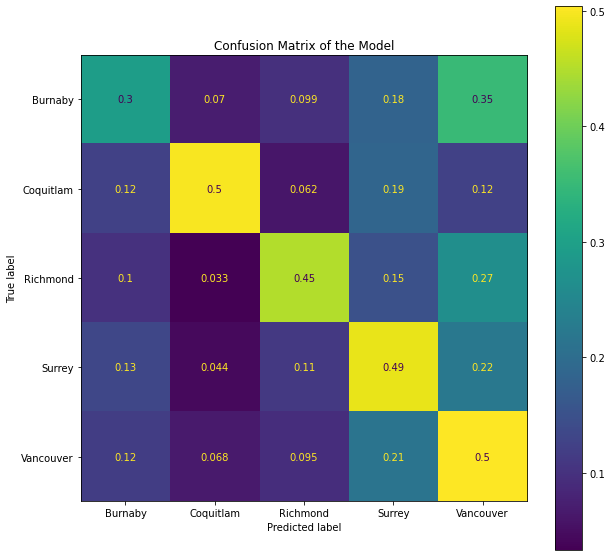

In [ ]:
_, axis = plt.subplots(figsize = (10, 10))
plot_confusion_matrix(model, X_test, y_test, ax = axis, normalize = 'true')
plt.title("Confusion Matrix of the Model")
plt.show()

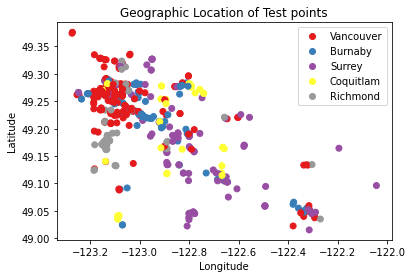

In [ ]:
# color legend taken from https://stackoverflow.com/questions/17411940/matplotlib-scatter-plot-legend
scatter = plt.scatter(X_test["lon"], X_test["lat"], c = (np.vectorize(city_to_num)(y_predict)), alpha = 1, cmap = 'Set1')
plt.legend(handles = scatter.legend_elements()[0], labels = classes)
plt.title("Geographic Location of Test points")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# Early results

In [ ]:
X_early = filtered_five[["lat", "lon"]]
y_early = filtered_five["city"]

X_train_early, X_test_early, y_train_early, y_test_early = train_test_split(X_early, y_early)

model_early = KNeighborsClassifier(n_neighbors = 7, weights = 'distance', algorithm = 'brute', p = 3)
model_early.fit(X_train_early, y_train_early)
y_predict_early = model_early.predict(X_test_early)
model_early.score(X_test_early, y_test_early)

0.5858085808580858

In [ ]:
cv_arr = cross_val_score(model_early, X_early, y_early)
print("Average cv:", cv_arr.mean())
print(cv_arr)

Average cv: 0.5185268808042942
[0.64329897 0.57319588 0.50721649 0.44123711 0.42768595]


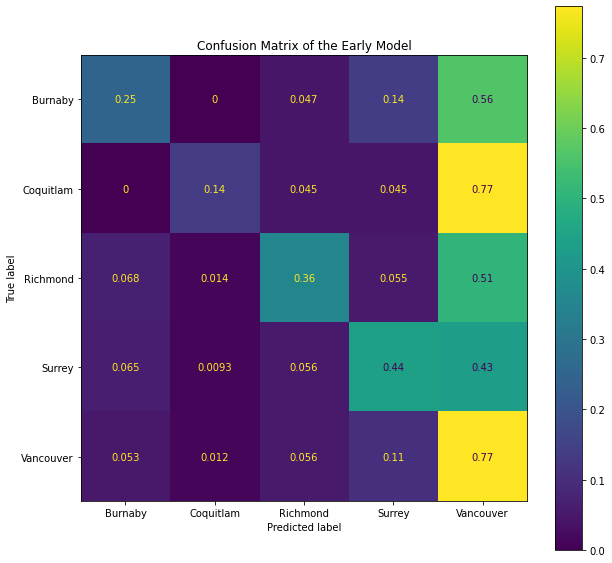

In [ ]:
_, axis = plt.subplots(figsize = (10, 10))
plot_confusion_matrix(model_early, X_test_early, y_test_early, ax = axis, normalize = 'true')
plt.title("Confusion Matrix of the Early Model")
plt.show()

# Other graphs of interest


## All data points graph

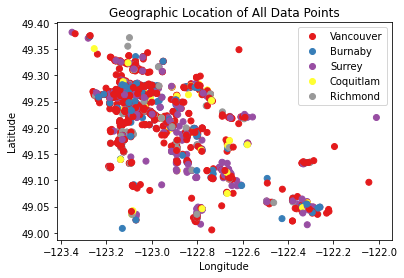

In [ ]:
scatter = plt.scatter(X["lon"], X["lat"], c = (np.vectorize(city_to_num)(y)), alpha = 1, cmap = 'Set1')
plt.legend(handles = scatter.legend_elements()[0], labels = classes)
plt.title("Geographic Location of All Data Points")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

## Undersample example

In [ ]:
X_undersample = filtered_five[["lat", "lon"]]
y_undersample = filtered_five["city"]

X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample, y_undersample)

model_undersample = make_pipeline(EditedNearestNeighbours(), KNeighborsClassifier(n_neighbors = 5))
model_undersample.fit(X_train_undersample, y_train_undersample)
y_predict_undersample = model_undersample.predict(X_test_undersample)
model_undersample.score(X_test_undersample, y_test_undersample)

0.5643564356435643

In [ ]:
cv_arr = cross_val_score(model_undersample, X_undersample, y_undersample)
print("Average cv:", cv_arr.mean())
print(cv_arr)

Average cv: 0.5267512993098747
[0.72164948 0.57525773 0.50309278 0.46185567 0.37190083]


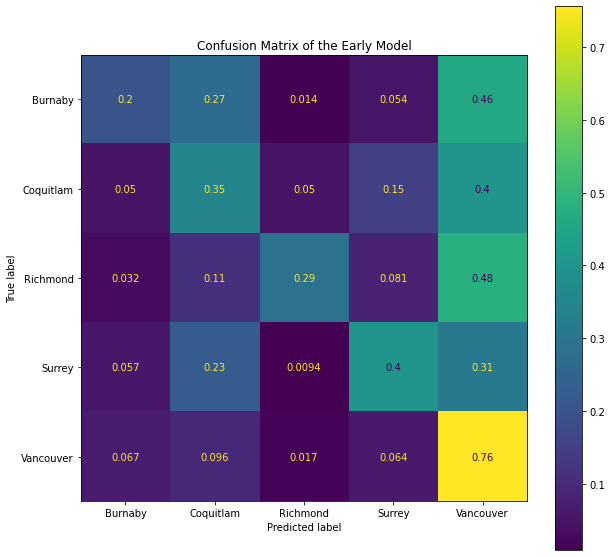

In [ ]:
_, axis = plt.subplots(figsize = (10, 10))
plot_confusion_matrix(model_undersample, X_test_undersample, y_test_undersample, ax = axis, normalize = 'true')
plt.title("Confusion Matrix of the Early Model")
plt.show()